# DEMO_TOY_IMAGES

Simple illustration of GLFM pipeline, replicating the example of the IBP linear-Gaussian model in (Griffiths and Ghahramani, 2011).

In [1]:
# ---------------------------------------------
# Import necessary libraries
# ---------------------------------------------
import numpy as np # import numpy matrix for calculus with matrices
import matplotlib.pyplot as plt # import plotting library
import time        # import time to be able to measure iteration speed
import sys
sys.path.append('../../src/GLFMpython/')
import GLFM

import pdb

In [2]:
# ---------------------------------------------
# 1. GENERATIVE MODEL
# ---------------------------------------------
print '\n 1. GENERATIVE MODEL\n'

print '\tGenerating feature images (components)...'
# Btrue contains the features images or components in order to generate the
# whole set of images
Btrue = 2*np.array([[0,1.0,0,0,0,0,  1,1,1,0,0,0, 0,1,0,0,0,0,         0,0,0,0,0,0, 0,0,0,0,0,0, 0,0,0,0,0,0],         [0,0.0,0,1,1,1,  0,0,0,1,0,1, 0,0,0,1,1,1,         0,0,0,0,0,0, 0,0,0,0,0,0, 0,0,0,0,0,0],         [0,0,0,0,0,0, 0,0,0,0,0,0, 0,0,0,0,0,0,         1,0,0,0,0,0, 1,1,0,0,0,0, 1,1,1,0,0,0],         [0,0,0,0,0,0, 0,0,0,0,0,0, 0,0,0,0,0,0,         0,0,0,1,1,1, 0,0,0,0,1,0, 0,0,0,0,1,0]])


 1. GENERATIVE MODEL

	Generating feature images (components)...


In [3]:
Btrue

array([[0., 2., 0., 0., 0., 0., 2., 2., 2., 0., 0., 0., 0., 2., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 2., 2., 2., 0., 0., 0., 2., 0., 2., 0., 0., 0., 2.,
        2., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 2., 0., 0., 0., 0., 0., 2., 2., 0., 0., 0., 0., 2., 2.,
        2., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 2., 2., 2., 0., 0., 0., 0., 2., 0., 0., 0.,
        0., 0., 2., 0.]])

In [4]:
D = Btrue.shape[1] # number of dimensions
K = Btrue.shape[0] # number of binary images

In [5]:
D

36

In [6]:
K

4

	Plotting feature images (Btrue)...


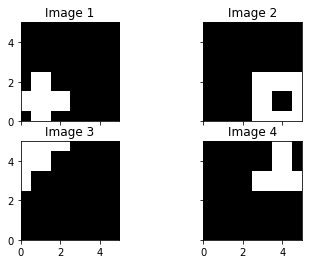

In [7]:
print '\tPlotting feature images (Btrue)...'
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
V = [ax1, ax2, ax3, ax4] # subfigures handlers
for i in xrange(len(Btrue)):
    pixels = Btrue[i].reshape(int(np.sqrt(Btrue.shape[1])),int(np.sqrt(Btrue.shape[1])))
    # Plot each feature component k
    V[i].imshow(pixels, cmap='gray',interpolation='nearest')
    V[i].set_ylim(0,5) # set Y-axis limits
    V[i].set_xlim(0,5) # set X-axis limits
    V[i].set_title('Image %d' % (i+1)) # set subplot title
#plt.ion()  # turn on interactive mode for plotting (so that the script continues)
plt.show() # display images component
plt.pause(0.0001)

In [8]:
print '\tSetting model parameters (ground truth) and generate database...'
N = 1000           # number of images to be generated
s2x = 0.5          # noise variance for the observations

print '\tGenerating data with N=%d and noise variance s2x=%.2f' % (N,s2x)
# generate matrix Z
Ztrue = 1.0*(np.random.rand(N,K) < 0.2)#np.random.randint(0,2,size=(N,K)).astype('float64')
# Next line generates the toy database
X = np.sqrt(s2x) * np.random.randn(N,D) + np.inner(Ztrue, Btrue.transpose())

	Setting model parameters (ground truth) and generate database...
	Generating data with N=1000 and noise variance s2x=0.50


In [13]:
len(X)

1000

In [16]:
len(X[0])

36

In [12]:
X

array([[-1.39731764,  1.17910644, -0.05949088, ..., -1.10278611,
        -0.49365456, -0.26169879],
       [ 1.63737936, -0.07572667, -0.90937973, ...,  0.82605894,
        -0.0079777 , -1.3396284 ],
       [ 0.06087039, -0.44988804,  0.08172691, ..., -0.01744608,
         0.06008987, -0.17085926],
       ...,
       [ 0.23302219,  0.45530932,  0.56063922, ...,  0.53920896,
        -0.27070135,  0.49954143],
       [-0.18106782,  2.33910393, -0.02417985, ..., -0.56887091,
        -0.48339604,  0.36144557],
       [ 0.07142194,  0.28498311, -0.05956019, ..., -0.61174773,
        -0.31660671, -0.5944385 ]])

In [19]:
# ---------------------------------------------
# 2. INITIALIZATION FOR GLFM ALGORITHM
# ---------------------------------------------

print '\n 2. INITIALIZATION\n'

print '\tInitializing Z...'
hidden = dict()
Kinit = 2 # initial number of latent features
hidden['Z'] = np.random.randint(0,2,size=(N,Kinit)).astype('float64')


 2. INITIALIZATION

	Initializing Z...


In [25]:
len(hidden['Z'][0])

2

In [26]:
len(hidden['Z'])

1000

In [20]:
print '\tInitialization of variables needed for the GLFM model...'
data = dict()
data['X'] = X
data['C'] = np.tile('g',(1,X.shape[1]))[0].tostring() # datatype vector

	Initialization of variables needed for the GLFM model...


In [27]:
data['C']

'gggggggggggggggggggggggggggggggggggg'

Real-valued (encoded as 'g'): the attribute takes values in the real line.

In [21]:
# params is optional
params = dict()
params['alpha'] = 2   # concentration parameter for the IBP
params['Niter'] = 100 # number of algorithm iterations
params['maxK'] = 10
params['verbose'] = 0 #do not show messages

In [28]:
# ---------------------------------------------
# 3. RUN INFERENCE FOR GLFM ALGORITHM
# ---------------------------------------------
print '\tInfering latent features...\n'
hidden = GLFM.infer(data, hidden, params)

	Infering latent features...

In C++: transforming input data...
done


Entering C++: Running Inference Routine...


Back to Python: OK

B_out[D,Kest,maxR] where D=36, Kest=5, maxR=1


In [30]:
# ---------------------------------------------
# 4. PROCESS RESULTS
# ---------------------------------------------
Kest = hidden['B'].shape[1] # number of inferred latent features
D = hidden['B'].shape[0]    # number of dimensions


In [31]:
Kest

5

In [32]:
D

36

	Print inferred latent features...


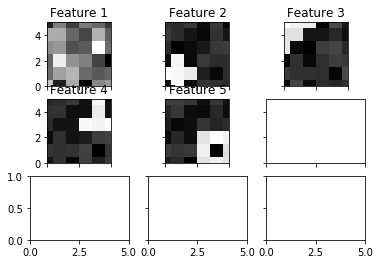

In [34]:
print '\tPrint inferred latent features...'
f, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, sharex='col', sharey='row')
V = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]

for k in xrange(hidden['B'].shape[1]):
    if k>len(V):
        break;

    # visualize each inferred dimension
    Zp = np.zeros(Kest)
    Zp[k] = 1.0

    #hidden['B'][:,k]
    #pixels = hidden['B'][:,k].reshape((int(np.sqrt(D)),int(np.sqrt(D))))
    Bpred = GLFM.computeMAP(data['C'],Zp, hidden) # MAP prediction for each dim d
    pixels = Bpred.reshape((int(np.sqrt(D)),int(np.sqrt(D))))
    # Plot
    V[k].imshow(pixels, cmap='gray',interpolation='none')
    V[k].set_ylim(0,5)
    V[k].set_xlim(0,5)
    V[k].set_title('Feature %d' % (k+1))
#plt.ion()  # interactive mode for plotting (script continues)
plt.show() # display figure
plt.pause(0.0001)


In [37]:
hidden

{'B': array([[[ 3.33238261e-02],
         [-3.24515029e-02],
         [-1.53966342e-01],
         [-1.49837672e-02],
         [ 1.62559365e-01]],
 
        [[-4.64073486e-01],
         [ 1.93084410e+00],
         [ 1.66596242e-01],
         [-5.04003043e-02],
         [-7.22040375e-02]],
 
        [[ 6.68575291e-02],
         [ 3.30180219e-02],
         [-3.55490816e-02],
         [-1.15900591e-01],
         [-2.21396952e-01]],
 
        [[-4.50736152e-01],
         [ 8.63077712e-02],
         [-3.94817002e-02],
         [ 1.35996740e-01],
         [ 1.88961964e+00]],
 
        [[-3.26476098e-01],
         [ 3.97835446e-02],
         [-1.00542552e-01],
         [-1.63529360e-01],
         [ 1.98135325e+00]],
 
        [[-3.14024310e-01],
         [-1.91635154e-02],
         [-1.02092838e-02],
         [ 1.05251906e-01],
         [ 1.89400595e+00]],
 
        [[-4.15702101e-01],
         [ 1.95208903e+00],
         [ 4.27258365e-02],
         [-4.60298939e-02],
         [ 7.44950759e-02

In [40]:
len(hidden['Z'])

1000

In [41]:
len(hidden['Z'][0])

5

In [43]:
hidden['B']

array([[[ 3.33238261e-02],
        [-3.24515029e-02],
        [-1.53966342e-01],
        [-1.49837672e-02],
        [ 1.62559365e-01]],

       [[-4.64073486e-01],
        [ 1.93084410e+00],
        [ 1.66596242e-01],
        [-5.04003043e-02],
        [-7.22040375e-02]],

       [[ 6.68575291e-02],
        [ 3.30180219e-02],
        [-3.55490816e-02],
        [-1.15900591e-01],
        [-2.21396952e-01]],

       [[-4.50736152e-01],
        [ 8.63077712e-02],
        [-3.94817002e-02],
        [ 1.35996740e-01],
        [ 1.88961964e+00]],

       [[-3.26476098e-01],
        [ 3.97835446e-02],
        [-1.00542552e-01],
        [-1.63529360e-01],
        [ 1.98135325e+00]],

       [[-3.14024310e-01],
        [-1.91635154e-02],
        [-1.02092838e-02],
        [ 1.05251906e-01],
        [ 1.89400595e+00]],

       [[-4.15702101e-01],
        [ 1.95208903e+00],
        [ 4.27258365e-02],
        [-4.60298939e-02],
        [ 7.44950759e-02]],

       [[-3.50493882e-01],
        [ 1.98